In [1]:
workers()

1-element Array{Int64,1}:
 1

In [2]:
addprocs(8);

In [3]:
workers()

8-element Array{Int64,1}:
 2
 3
 4
 5
 6
 7
 8
 9

In [2]:
@everywhere begin
    push!(LOAD_PATH,"./src/")
    import nbody
    reload("nbody")
    nb = nbody;
end

n => {0,2097152,0,0,0,0}
m => [0.0,32.70537839355947,0.0,0.0,0.0,0.0]
t = read(f,Float64) => 0.0196078431372549
z = read(f,Float64) => 50.0
z => 50.0
t => 0.0196078431372549


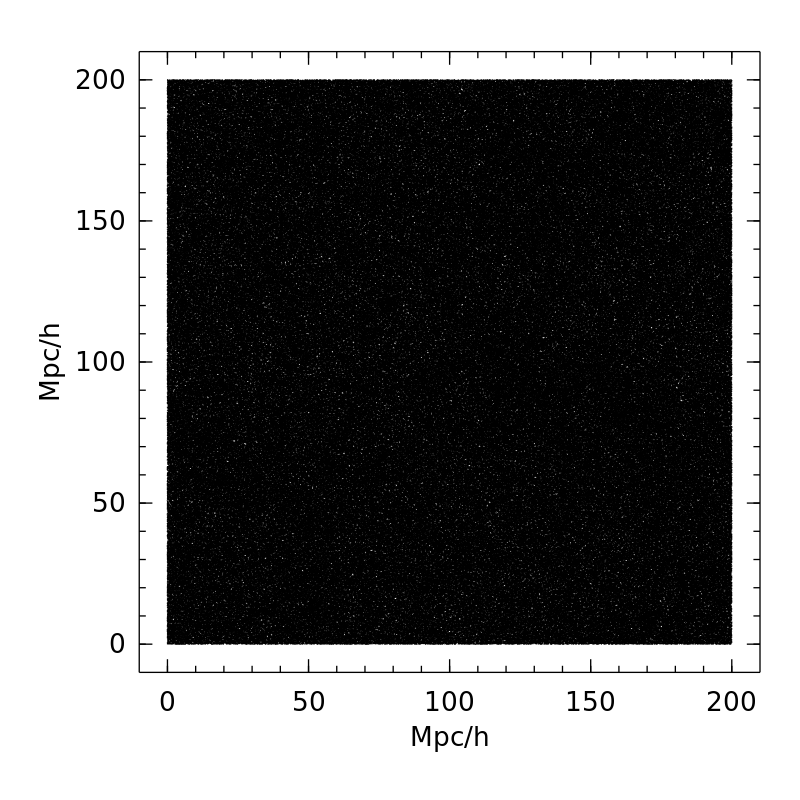

In [5]:
w = nb.load_G2("/home/skariel/Desktop/N-GenIC_large/ICs/ics");
using Winston
hold(false)
Winston.set_default_plot_size(800,800)
nb.plot(w)

In [6]:
#w = nb.filter_r(w, 15297.5);
nw = nb.filter_r(w, 100000.0)
#nw = nb.filter_r(w, 50000.0);
@show nw.n;
nw.opening_alpha2 = 0.5
nw.smth2 = 1000.0^2;
sim = nb.Simulation(deepcopy(nw), limit_by_steps=false, stepc=1, ti=0.0196078431372549, tf=0.5, n_test_particle=3*nw.n);

smth = sqrt(w.smth2) => 0.2
opening_alpha = sqrt(w.opening_alpha2) => 0.5
dtfrac = w.dtfrac => 0.35
space = typeof(w.space) => Cosmological
Ω0 = w.Ω0 => 0.3089
ΩΛ = w.ΩΛ => 0.6911
nw.n => 1099641


s=1 t=0.0196078431372549 dt=0.014475879071288198 /9.021117455s
s=2 t=0.034083722208543096 dt=0.019518402300263478 /11.716099507s
s=3 t=0.05360212450880657 dt=0.024678578360818725 /11.664803182s
s=4 t=0.07828070286962528 dt=0.02994872234578565 /11.554611814s
s=5 t=0.10822942521541094 dt=0.03455792212460267 /11.936221419s
s=6 t=0.1427873473400136 dt=0.039065876976982016 /12.315001944s
s=7 t=0.1818532243169956 dt=0.04218580623498253 /12.54001923s
s=8 t=0.22403903055197813 dt=0.04357135271815452 /12.476746868s
s=9 t=0.26761038327013265 dt=0.04212606156914705 /12.792298001s
s=10 t=0.30973644483927965 dt=0.041389351631484564 /13.177285989s
s=11 t=0.35112579647076425 dt=0.036701932542938354 /12.2803503s
s=12 t=0.38782772901370255 dt=0.03398331000837326 /12.761327179s
s=13 t=0.42181103902207584 dt=0.03135356265119989 /12.968779207s
s=14 t=0.45316460167327577 dt=0.029791471577460964 /13.373294138s
s=15 t=0.48295607325073675 dt=0.01704392674926325 /13.399588906s

--- Done!

elapsed time: 190.734

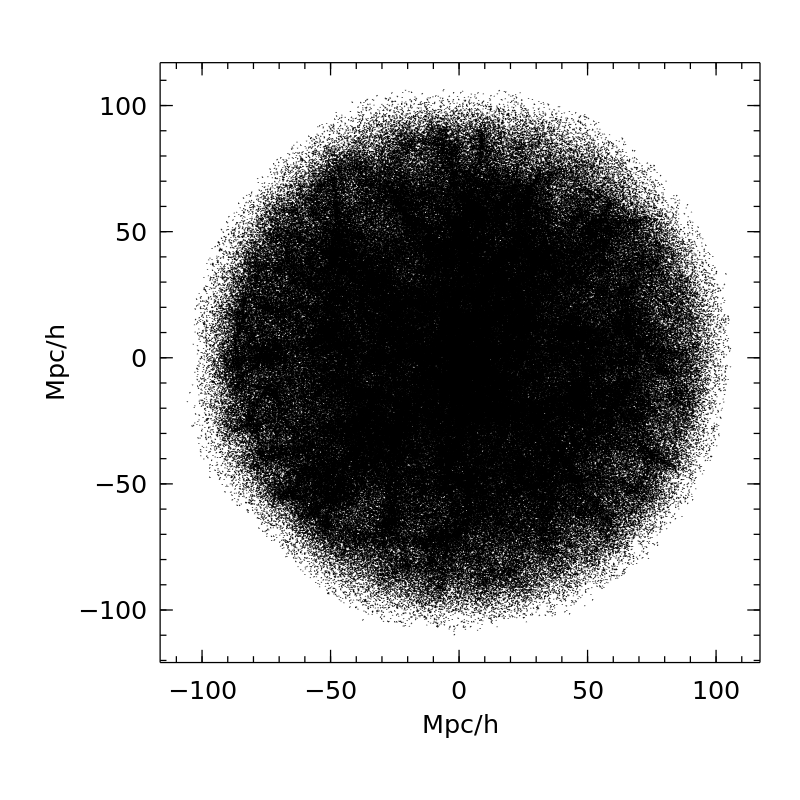

In [7]:
nb.exec!(sim, false)
nb.plot(sim.w)

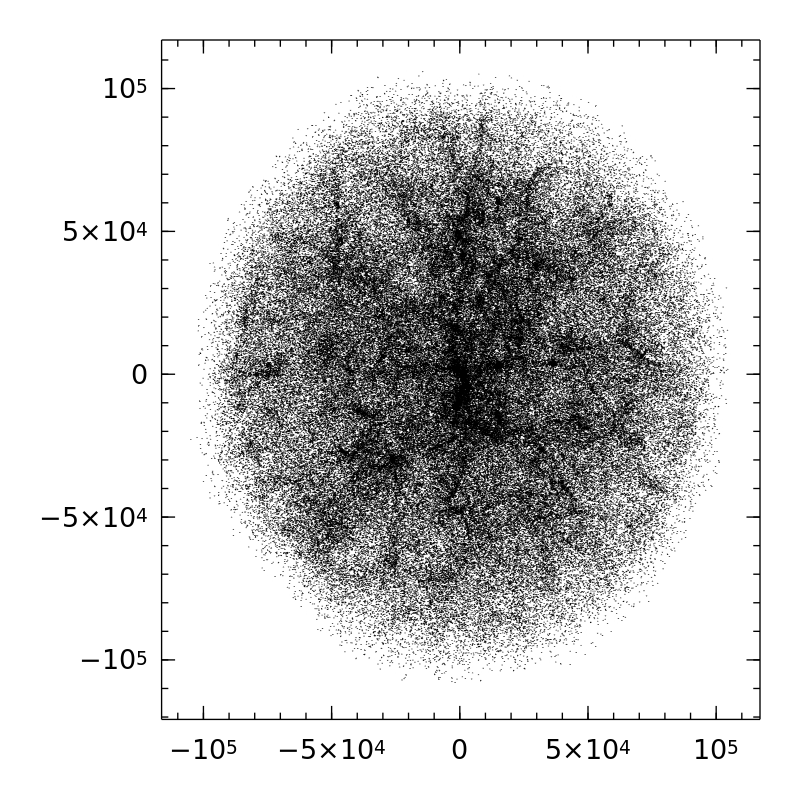

In [8]:
hold(false)
scatter([p._x for p in sim.w.particles], [p._y for p in sim.w.particles], 0.00003)

In [9]:
nwr = nb.filter_rate(sim.w, 128)
@show nwr.n;
nwr.opening_alpha2 = 0.5
nwr.smth2 = 5150.0^2;
nsim = nb.Simulation(deepcopy(nwr), limit_by_steps=false, stepc=1, ti=0.0196078431372549, tf=0.5, n_test_particle=3*nwr.n);

smth = sqrt(w.smth2) => 1000.0
opening_alpha = sqrt(w.opening_alpha2) => 0.7071067811865476
dtfrac = w.dtfrac => 0.35
space = typeof(w.space) => Cosmological
Ω0 = w.Ω0 => 0.3089
ΩΛ = w.ΩΛ => 0.6911
nwr.n => 8591


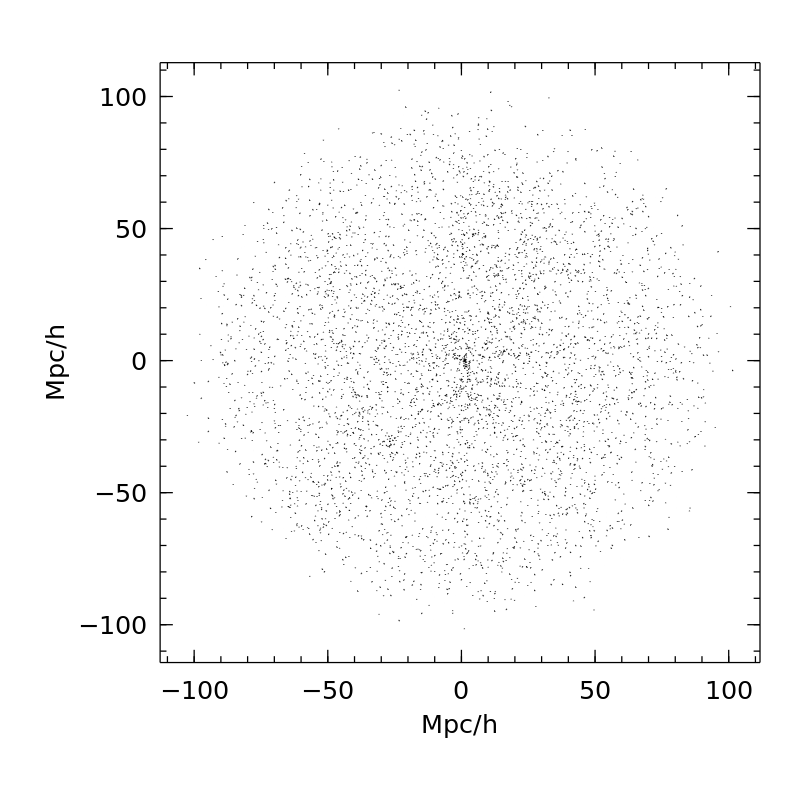

In [10]:
nb.plot(nsim.w)

In [11]:
# set new ICs and remember the old
#real_xi = [x for x in sim.xi]
#real_yi = [y for y in sim.yi]
#real_zi = [z for z in sim.zi]
#real_x0 = [p._x for p in sim.w.particles]
#real_y0 = [p._y for p in sim.w.particles]
#real_z0 = [p._z for p in sim.w.particles]

#for i in 1:sim.w.n
#    sim.xi[i] = real_x0[i]
#    sim.yi[i] = real_y0[i]
#    sim.zi[i] = real_z0[i]
#end
opt = nb.Optimization(nsim);

 grade=401558.4506492873 n=6959


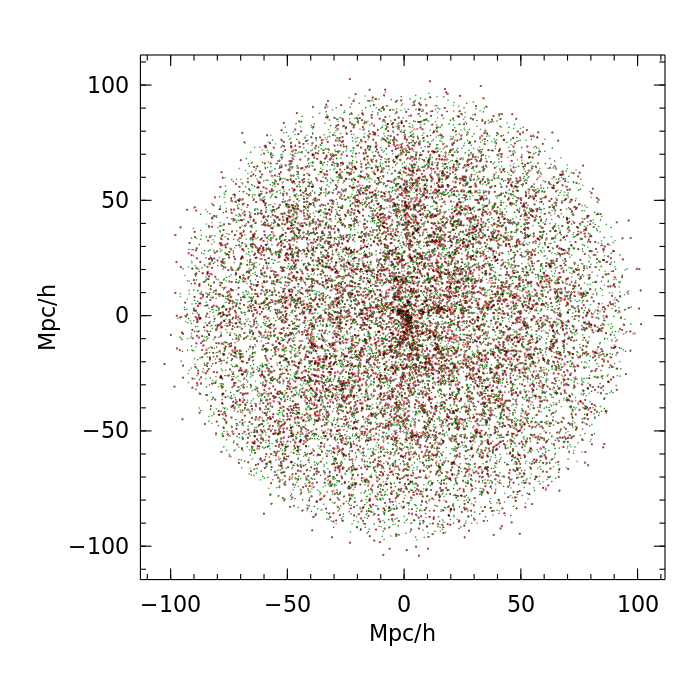

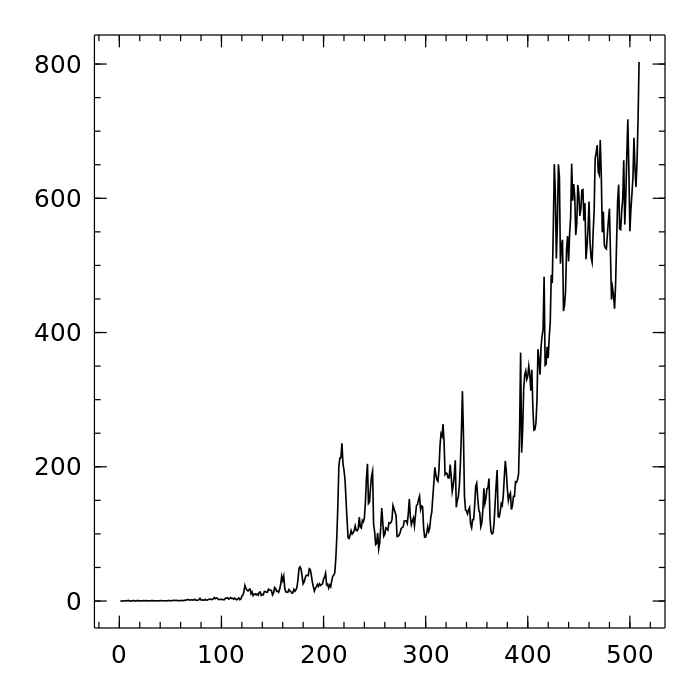

maximum(opt.grad) => 3.5535962969223267e8
g=803.1169012985746


In [12]:
step=0
N=550
ga = Float64[]
Winston.set_default_plot_size(700,700)
import IJulia
for l_target_t in linspace(log(opt.sim.tf*0.99), log(opt.sim.ti), N)    
    step+=1
    target_t = exp(l_target_t)
    
    println("----------------------- ti=",target_t," comp: ",step/N*100)
    opt.sim.ti = target_t
    g=nb.optimize(opt, 3, 500.0)
    send_ipython(IJulia.publish, msg_pub(IJulia.execute_msg, "clear_output", [:wait => true]))
    #? nb.exec!(sim, false, silent=true)
    display(nb.plot(opt))
    push!(ga, g/500.0)
    display(plot([1:length(ga)], ga))
    
    #pp = FramedPlot()
    #add(pp, Histogram(hist(opt.grad[opt.grad.>1000])...))    
    #display(pp)
    println("==============================================")
    @show maximum(opt.grad)
    println("g=",g/500.0)
    if g/400000.0>1.0
        break
    end
    #break
end

In [13]:
nb.optimize(opt, 3, 50)

step=1 grade=401558.4506492873 n=8591
SHAKING!!!
   - ls: iter=12 dgrade=0.9877245031287483 f=0.14285714285714288
step=2 grade=403201.9435142519 n=7732
SHAKING!!!
   - ls: iter=12 dgrade=1.0070905993906711 f=0.0034683059831665222
step=3 grade=402901.33893140126 n=6959


402901.33893140126

In [14]:
nb.save(opt.sim, "nsim.out")

#Velocities

In [3]:
nsim = nb.load_sim("nsim.out");

tn => 25773


In [4]:
nsim.ti

0.02495433595857336

In [40]:
function getv(s::nb.Simulation, ns::nb.Simulation)
    vx = zeros(ns.w.n)
    @inbounds for n in 1:ns.w.n
        num::Int64 = 0
        v::Float64 = 0.0
        pn = ns.w.particles[n]
        for i in 1:s.w.n
            pi = s.w.particles[i]

            dx = pi._x - pn._x
            dy = pi._y - pn._y
            dz = pi._z - pn._z
            d2 = dx*dx+dy*dy+dz*dz

            if d2 < 2000.0*2000.0#ns.w.smth2
                num += 1
                v += s.w.vx[i]
            end

        end
        vx[n] = v/num
        n % 100 == 0 && @show n/ns.w.n*100
    end
    vx
end
vx = getv(sim, nsim)

(n / ns.w.n) * 100 => 1.1640088464672331
(n / ns.w.n) * 100 => 2.3280176929344663
(n / ns.w.n) * 100 => 3.4920265394016994
(n / ns.w.n) * 100 => 4.6560353858689325
(n / ns.w.n) * 100 => 5.820044232336166
(n / ns.w.n) * 100 => 6.984053078803399
(n / ns.w.n) * 100 => 8.148061925270632
(n / ns.w.n) * 100 => 9.312070771737865
(n / ns.w.n) * 100 => 10.476079618205098
(n / ns.w.n) * 100 => 11.640088464672331
(n / ns.w.n) * 100 => 12.804097311139564
(n / ns.w.n) * 100 => 13.968106157606798
(n / ns.w.n) * 100 => 15.13211500407403
(n / ns.w.n) * 100 => 16.296123850541264
(n / ns.w.n) * 100 => 17.460132697008497
(n / ns.w.n) * 100 => 18.62414154347573
(n / ns.w.n) * 100 => 19.788150389942963
(n / ns.w.n) * 100 => 20.952159236410196
(n / ns.w.n) * 100 => 22.11616808287743
(n / ns.w.n) * 100 => 23.280176929344663
(n / ns.w.n) * 100 => 24.444185775811896
(n / ns.w.n) * 100 => 25.60819462227913
(n / ns.w.n) * 100 => 26.772203468746365
(n / ns.w.n) * 100 => 27.936212315213595
(n / ns.w.n) * 100 => 29

8591-element Array{Float64,1}:
 -127.595 
   74.0747
  -12.5913
   35.1786
   11.9526
   89.3656
  146.961 
   46.6584
  -71.2037
  203.961 
  127.27  
   75.8651
  226.637 
    ⋮     
 -147.9   
  -56.8508
  -52.6274
 -170.472 
 -101.334 
  -31.1967
  -59.8041
   25.1544
   19.0526
   24.639 
  -17.4184
   25.6277

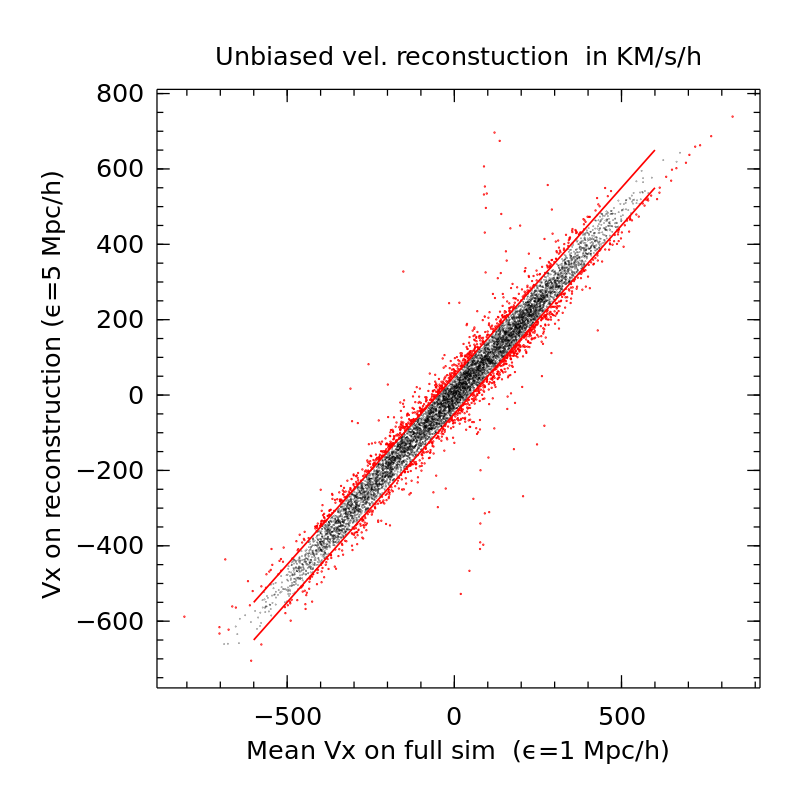

In [43]:
hold(false)
ix = find(abs(vx-nsim.w.vx).<=50.0);
p1 = scatter(vx[ix], nsim.w.vx[ix], 0.01)
xlabel("Mean Vx on full sim  (ϵ=1 Mpc/h)")
ylabel("Vx on reconstruction (ϵ=5 Mpc/h)")
title("Unbiased vel. reconstuction  in KM/s/h")
hold(true)
plot([-600,600],[-550,650],"red")
plot([-600,600],[-650,550],"red")
ix = find(abs(vx-nsim.w.vx).>50.0);
scatter(vx[ix], nsim.w.vx[ix], 0.05, color="red")


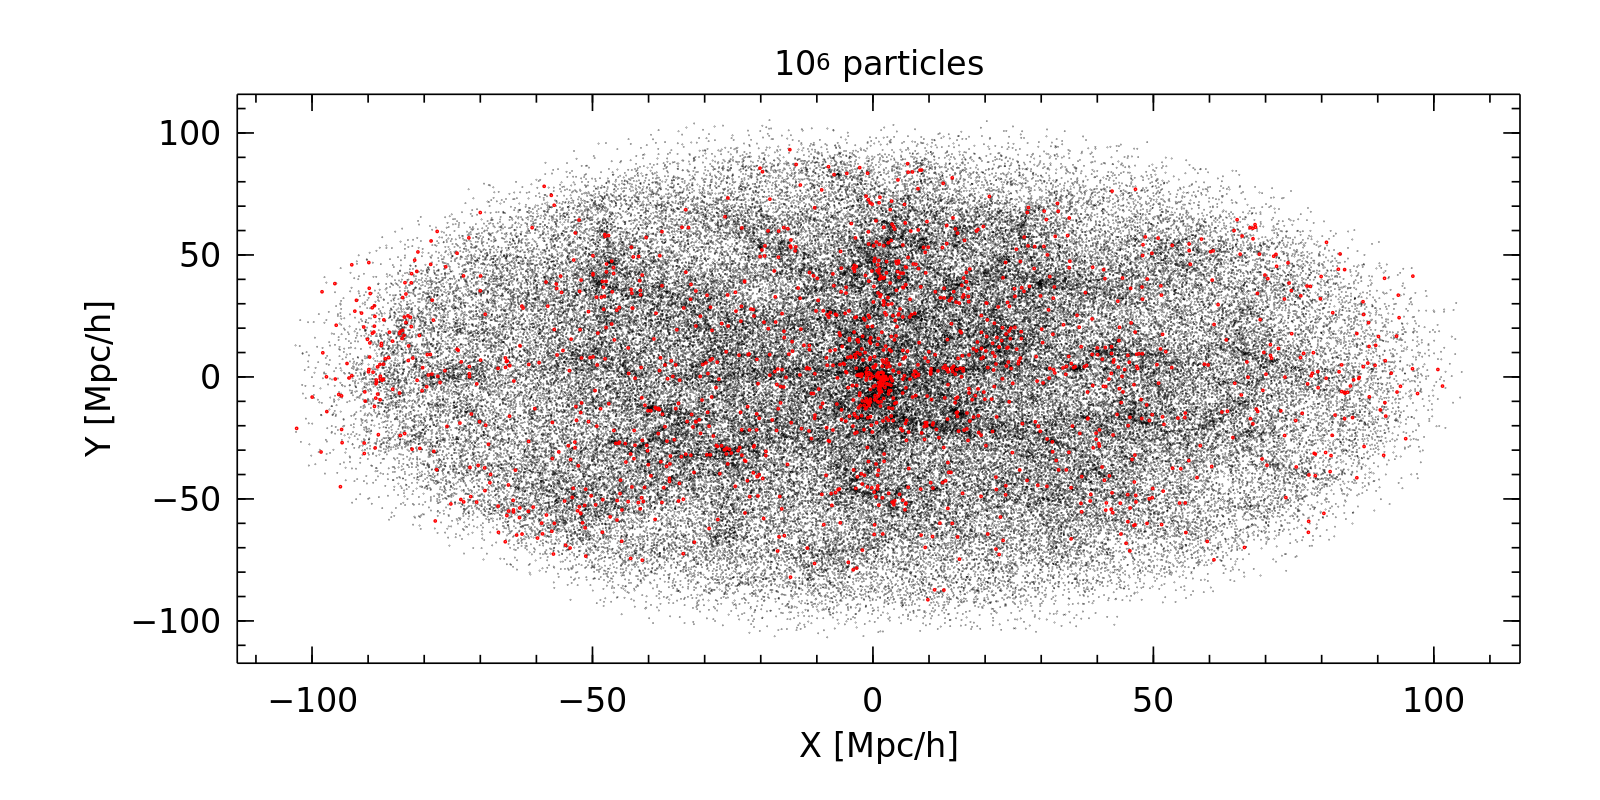

In [47]:
hold(false)
p2 = scatter([p._x/1000.0 for p in sim.w.particles[1:10:end]], [p._y/1000.0 for p in sim.w.particles[1:10:end]], 0.01)
hold(true)
scatter([p._x/1000.0 for p in nsim.w.particles[ix]], [p._y/1000.0 for p in nsim.w.particles[ix]], 0.1, color="red")
xlabel("X [Mpc/h]")
ylabel("Y [Mpc/h]")
title("10^6 particles")

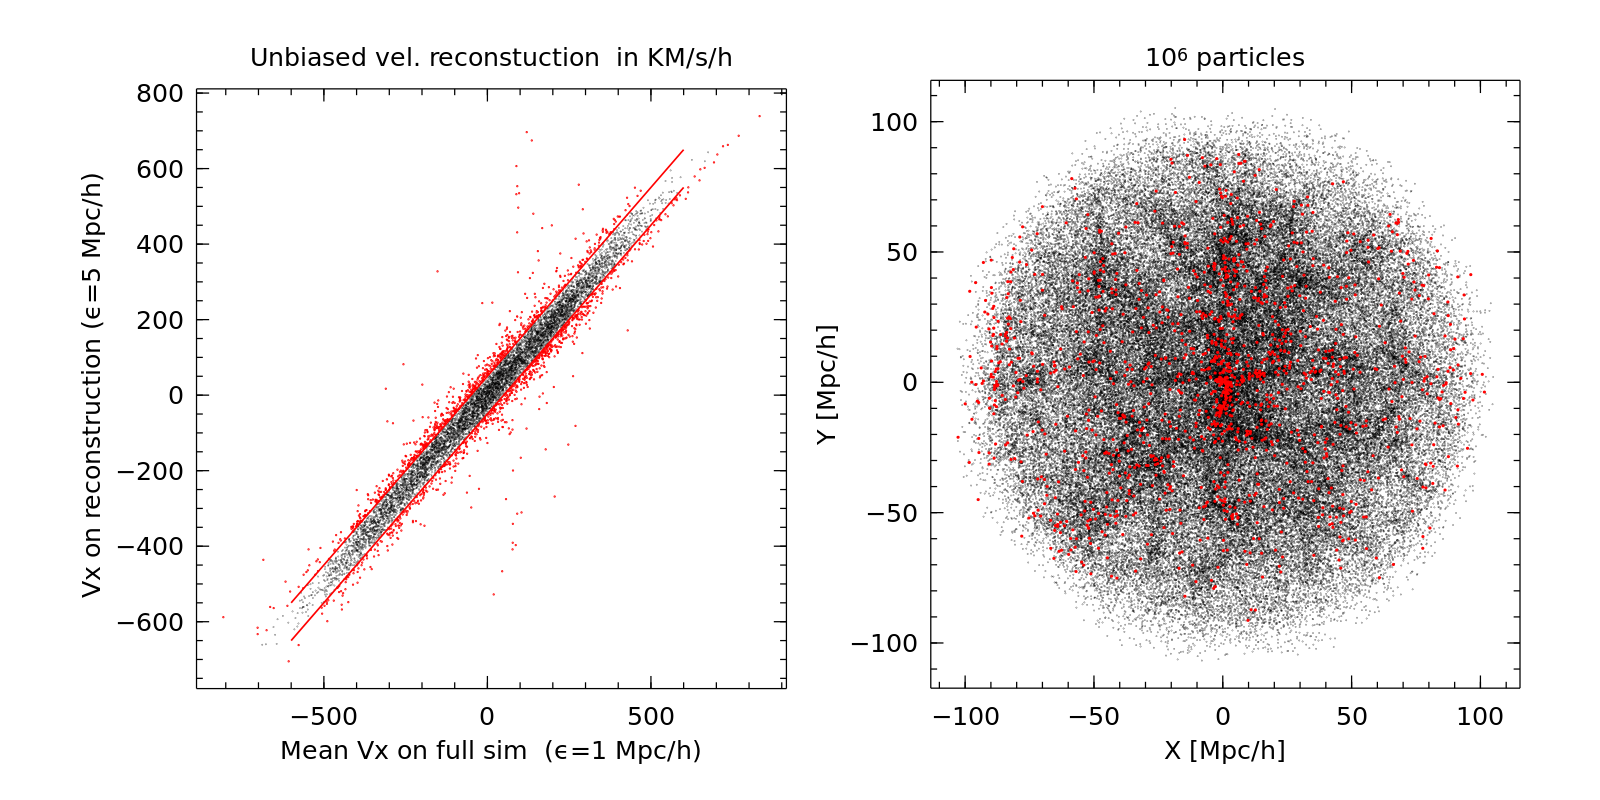

In [48]:
Winston.set_default_plot_size(1600,800)
hold(false)
t = Table(1,2)
t[1,1] = p1
t[1,2] = p2
display(t)